# [OpenAI completion/image to image functions](../openai_cli/completion/functions/image_to_image.py)

In [1]:
import os
from abcli import fullname
from abcli import string
from abcli.plugins import seed
from openai_cli import NAME, VERSION
from openai_cli.completion.prompts.image_to_image import i2i_prompt
from openai_cli.completion.functions.image_to_image import i2i_function
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")
logger.info(f"using {NAME}-{VERSION}.")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2295.1-unknown, built on 25 June 2023, 03:45:04
using openai_cli-2.113.1.


In [2]:
object_name = "openai_functions_v4"

In [3]:
HOME=os.getenv("HOME")
%env abcli_object_name={object_name}
%env abcli_object_path={HOME}/storage/abcli/{object_name}

env: abcli_object_name=openai_functions_v4
env: abcli_object_path=/Users/kamangir/storage/abcli/openai_functions_v4


In [4]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

abcli select $1
abcli download

📂 openai_functions_v4
openai_functions_v4 open download started.
download: s3://kamangir/bolt/openai_functions_v4/abcli.log to ./abcli.log
download: s3://kamangir/bolt/openai_functions_v4/openai_functions_v4 to ./openai_functions_v4
openai_functions_v4 download completed.


In [5]:
prompt = i2i_prompt(returns = "a darker version of the input image")

Write a python function named i2i_function_40333655 that
 inputs an image as a numpy array and
 does not run a for loop on the pixels and
uses numpy vector functions and
imports all modules that are used in the code and
type-casts the output correctly and
 returns a darker version of the input image as a numpy array.
message='Request to OpenAI API' method=post path=https://api.openai.com/v1/completions
message='OpenAI API response' path=https://api.openai.com/v1/completions processing_ms=10455 request_id=e62153959b2c89f6a03d9bb5b801960c response_code=200
response: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\n\nimport numpy as np\nimport matplotlib.pyplot as plt\n\ndef i2i_function_40333655(image):\n    # Get image as a numpy array\n    img_arr = np.asarray(image)\n    # Do not run a for loop on the pixels\n    # Type-cast the output correctly\n    # Darken the image\n    darkened_img_arr = np.round(img_arr*0.7).astype(

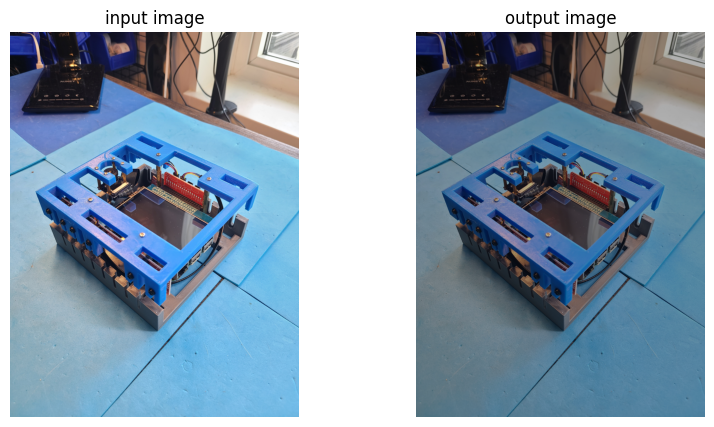

-> /Users/kamangir/storage/abcli/openai_functions_v4/i2i_function_code.json


In [6]:
func = i2i_function()
assert func.generate(prompt.create(func.function_name))[0]

In [7]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

abcli select $1
abcli tag set . built_by_notebook
abcli upload

📂 openai_functions_v4


openai_functions_v4 += #built_by_notebook.


confirmed: openai_functions_v4 does not exist.
openai_functions_v4 open upload started.
upload: ./abcli.log to s3://kamangir/bolt/openai_functions_v4/abcli.log
upload: ./i2i_function_code.json to s3://kamangir/bolt/openai_functions_v4/i2i_function_code.json


openai_functions_v4 += #open.


In [8]:
seed.log("download_object")

abcli select openai_functions_v4
abcli download
open .


In [9]:
# END